In [1]:
import sys
import os

# Add the backend directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../backend')))

from scripts.chunk import TextChunker, PDFChunker
from utils.helpers import *

%load_ext autoreload
%autoreload 2

## Test chunking methods

In [2]:
# Load a text file from ../data folder
with open('../data/AI_Articles/Artificial intelligence.txt', 'r') as file:
    text = file.read()

text[:1000]

'Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs.\nHigh-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into general applications, often without being called AI because once something becomes useful enough and common eno

In [6]:
chunker = TextChunker(text, output_document=False)

In [7]:
# Recursive
chunks = chunker.recursive_chunk(chunk_size=1024, by_tokens=True)
len(chunks)

22

In [8]:
display_chunks(chunks, 5)

In [8]:
# Semantic
chunks = chunker.semantic_chunk()
len(chunks)


31

In [9]:
display_chunks(chunks, 5)

In [10]:
# Cluster semantic
chunks = chunker.cluster_chunk()
len(chunks)

97

In [11]:
display_chunks(chunks, 5)

Index,Chunk
0,"Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems . It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs. High-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g ., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go) . However, many AI applications are not perceived as AI: ""A lot of cutting edge AI has filtered into general applications, often without being called AI because once something becomes useful enough and common enough it's not labeled AI anymore."" Various subfields of AI research are centered around particular goals and the use of particular tools. The traditional goals of AI research include reasoning, knowledge representation, planning, learning, natural language processing, perception, and support for robotics . General intelligence—the ability to complete any task performed by a human on an at least equal level—is among the field's long-term goals . To reach these goals, AI researchers have adapted and integrated a wide range of techniques, including search and mathematical optimization, formal logic, artificial neural networks, and methods based on statistics, operations research, and economics . AI also draws upon psychology, linguistics, philosophy, neuroscience, and other fields. Artificial intelligence was founded as an academic discipline in 1956, and the field went through multiple cycles of optimism throughout its history, followed by periods of disappointment and loss of funding, known as AI winters"
1,". Funding and interest vastly increased after 2012 when deep learning outperformed previous AI techniques . This growth accelerated further after 2017 with the transformer architecture, and by the early 2020s many billions of dollars were being invested in AI and the field experienced rapid ongoing progress in what has become known as the AI boom . The emergence of advanced generative AI in the midst of the AI boom and its ability to create and modify content exposed several unintended consequences and harms in the present and raised concerns about the risks of AI and its long-term effects in the future, prompting"
2,discussions about regulatory policies to ensure the safety and benefits of the technology
3,. == Goals ==
4,"The general problem of simulating (or creating) intelligence has been broken into subproblems. These consist of particular traits or capabilities that researchers expect an intelligent system to display . The traits described below have received the most attention and cover the scope of AI research. === Reasoning and problem-solving === Early researchers developed algorithms that imitated step-by-step reasoning that humans use when they solve puzzles or make logical deductions . By the late 1980s and 1990s, methods were developed for dealing with uncertain or incomplete information, employing concepts from probability and economics. Many of these algorithms are insufficient for solving large reasoning problems because they experience a ""combinatorial explosion"": They become exponentially slower as the problems grow. Even humans rarely use the step-by-step deduction that early AI research could model . They solve most of their problems using fast, intuitive judgments. Accurate and efficient reasoning is an unsolved problem."


In [16]:
# Statistical
chunks = chunker.statistical_chunk()
len(chunks)

2025-04-17 11:51:04 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 300. Splitting to sentences before semantically merging.


  0%|          | 0/11 [00:00<?, ?it/s]

81

In [17]:
display_chunks(chunks, 5)

Index,Chunk
0,"Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs. High-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: ""A lot of cutting edge AI has filtered into general applications, often without being called AI because once something becomes useful enough and common enough it's not labeled AI anymore."" Various subfields of AI research are centered around particular goals and the use of particular tools. The traditional goals of AI research include reasoning, knowledge representation, planning, learning, natural language processing, perception, and support for robotics. General intelligence—the ability to complete any task performed by a human on an at least equal level—is among the field's long-term goals."
1,"To reach these goals, AI researchers have adapted and integrated a wide range of techniques, including search and mathematical optimization, formal logic, artificial neural networks, and methods based on statistics, operations research, and economics. AI also draws upon psychology, linguistics, philosophy, neuroscience, and other fields. Artificial intelligence was founded as an academic discipline in 1956, and the field went through multiple cycles of optimism throughout its history, followed by periods of disappointment and loss of funding, known as AI winters. Funding and interest vastly increased after 2012 when deep learning outperformed previous AI techniques. This growth accelerated further after 2017 with the transformer architecture, and by the early 2020s many billions of dollars were being invested in AI and the field experienced rapid ongoing progress in what has become known as the AI boom. The emergence of advanced generative AI in the midst of the AI boom and its ability to create and modify content exposed several unintended consequences and harms in the present and raised concerns about the risks of AI and its long-term effects in the future, prompting discussions about regulatory policies to ensure the safety and benefits of the technology."
2,"== Goals == The general problem of simulating (or creating) intelligence has been broken into subproblems. These consist of particular traits or capabilities that researchers expect an intelligent system to display. The traits described below have received the most attention and cover the scope of AI research. === Reasoning and problem-solving === Early researchers developed algorithms that imitated step-by-step reasoning that humans use when they solve puzzles or make logical deductions. By the late 1980s and 1990s, methods were developed for dealing with uncertain or incomplete information, employing concepts from probability and economics. Many of these algorithms are insufficient for solving large reasoning problems because they experience a ""combinatorial explosion"":"
3,"They become exponentially slower as the problems grow. Even humans rarely use the step-by-step deduction that early AI research could model. They solve most of their problems using fast, intuitive judgments. Accurate and efficient reasoning is an unsolved problem. === Knowledge representation === Knowledge representation and knowledge engineering allow AI programs to answer questions intelligently and make deductions about real-world facts. Formal knowledge r

In [19]:
chunks = chunker.llm_chunk()
len(chunks)

Processing chunks: 100%|██████████| 555/555 [00:22<00:00, 24.78it/s]


79

In [20]:
display_chunks(chunks, 10)

Index,Chunk
0,"Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems . It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs. High-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g ., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go) . However, many AI applications are not perceived as AI: ""A lot of cutting edge AI has filtered into general applications, often without being called AI because once something becomes useful enough and common enough it's not labeled AI anymore."""
1,"Various subfields of AI research are centered around particular goals and the use of particular tools. The traditional goals of AI research include reasoning, knowledge representation, planning, learning, natural language processing, perception, and support for robotics . General intelligence—the ability to complete any task performed by a human on an at least equal level—is among the field's long-term goals . To reach these goals, AI researchers have adapted and integrated a wide range of techniques, including search and mathematical optimization, formal logic, artificial neural networks, and methods based on statistics, operations research, and economics . AI also draws upon psychology, linguistics, philosophy, neuroscience, and other fields."
2,"Artificial intelligence was founded as an academic discipline in 1956, and the field went through multiple cycles of optimism throughout its history, followed by periods of disappointment and loss of funding, known as AI winters . Funding and interest vastly increased after 2012 when deep learning outperformed previous AI techniques . This growth accelerated further after 2017 with the transformer architecture, and by the early 2020s many billions of dollars were being invested in AI and the field experienced rapid ongoing progress in what has become known as the AI boom . The emergence of advanced generative AI in the midst of the AI boom and its ability to create and modify content exposed several unintended consequences and harms in the present and raised concerns about the risks of AI and its long-term effects in the future, prompting discussions about regulatory policies to ensure the safety and benefits of the technology ."
3,"== Goals == The general problem of simulating (or creating) intelligence has been broken into subproblems. These consist of particular traits or capabilities that researchers expect an intelligent system to display . The traits described below have received the most attention and cover the scope of AI research. === Reasoning and problem-solving === Early researchers developed algorithms that imitated step-by-step reasoning that humans use when they solve puzzles or make logical deductions . By the late 1980s and 1990s, methods were developed for dealing with uncertain or incomplete information, employing concepts from probability and economics. Many of these algorithms are insufficient for solving large reasoning problems because they experience a ""combinatorial explosion"": They become exponentially slower as the problems grow. Even humans rarely use the step-by-step deduction that early AI research could model . They solve most of their problems using fast, intuitive judgments. Accurate and efficient reasoning is an unsolved problem."
4,"=== Knowledge representation === Knowledge representation and knowledge engineering allow AI programs to answer questions intelligently and make deductions about real-world facts . 

## PDF Chunking

In [85]:
pdf_path = "../data/courses/MIT18_S096F15_Ses2_4.pdf"
# pdf_path = "../data/courses/example_table.pdf"
pdf_chunker = PDFChunker(pdf_path=pdf_path)

In [86]:
chunks = pdf_chunker.chunks
chunks

In [11]:
formated_chunks = pdf_chunker.formated_chunks
formated_chunks[0]

[Document(metadata={'type': 'text'}, page_content='Machine Learning For Predicitive Maintenance Assignment 5'),
 Document(metadata={'type': 'text'}, page_content='Yannis Laaroussi - Sciper: 369854, Luc Harrison - Sciper: 315788'),
 Document(metadata={'type': 'text'}, page_content='November 22, 2024'),
 Document(metadata={'type': 'text'}, page_content='Step 1'),
 Document(metadata={'type': 'text'}, page_content='For this step, we chose to evaluate the pretrained models using the following performance metrics: Accuracy, Precision, Recall, F1 Score and ROC AUC (since the dataset is unbal- anced). These metrics are optimal because the task performed by these models is binary classification (since the test images are either damage free or crack).'),
 Document(metadata={'type': 'text'}, page_content='The results of these metrics are shown in Table 1. We clearly observe that model A displays the best performance with perfect classification of the test data. Model C also demonstrates good perf

In [45]:
chunks[3].metadata.orig_elements

In [10]:
chunks[0].metadata.orig_elements[0].to_dict()

{'type': 'Title',
 'element_id': '304eeaa5-72a6-4aa0-a4ac-2614175a0557',
 'text': '1 Principal Component Analysis in High Dimensions and the Spike Model',
 'metadata': {'detection_class_prob': 0.7834422588348389,
  'coordinates': {'points': ((189.73007202148438, 161.98090000000005),
    (189.73007202148438, 251.6447888888889),
    (1530.515848333333, 251.6447888888889),
    (1530.515848333333, 161.98090000000005)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-04-09T15:34:11',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 1}}

In [11]:
elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '504465ae-c192-4d4f-af18-2fdcbdf430f1',
 'text': 'Histor doernlues UNC wl soke sams 0 Serdtelas 15 T T',
 'metadata': {'coordinates': {'points': ((258.8916777777778,
     1260.019768611111),
    (258.8916777777778, 1817.2027588888889),
    (1463.6116874999998, 1817.2027588888889),
    (1463.6116874999998, 1260.019768611111)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-04-09T15:34:11',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 9,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAItBLUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4

In [6]:
elements = chunks[0].metadata.orig_elements
chunk_images = [el for el in elements if 'Table' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Table',
 'element_id': '00f24c3e-f137-455c-a2e8-f8a8ae5d7752',
 'text': 'Model Accuracy F1 Score Precision Recall ROC AUC A 100% 1.00 1.00 1.00 1.00 B 92.23% 0.87 0.96 0.79 0.95 C 98.71% 0.98 1.00 0.96 1.00',
 'metadata': {'detection_class_prob': 0.9279423356056213,
  'coordinates': {'points': ((310.9493103027344, 1288.9327392578125),
    (310.9493103027344, 1461.1407470703125),
    (1391.4195556640625, 1461.1407470703125),
    (1391.4195556640625, 1288.9327392578125)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2024-11-22T18:35:27',
  'text_as_html': '<table><thead><tr><th>Model</th><th>| Accuracy |</th><th>F1 Score |</th><th>Precision</th><th>| Recall</th><th>| ROC AUC</th></tr></thead><tbody><tr><td>A</td><td>100%</td><td>1.00</td><td>1.00</td><td>1.00</td><td>1.00</td></tr><tr><td>B</td><td>92.23%</td><td>0.87</td><td>0.96</td><td>0.79</td><td>0.95</td></tr><tr><td>Cc</td><td>98.71%</td><td>0.98</td><td>1.00</td><td>

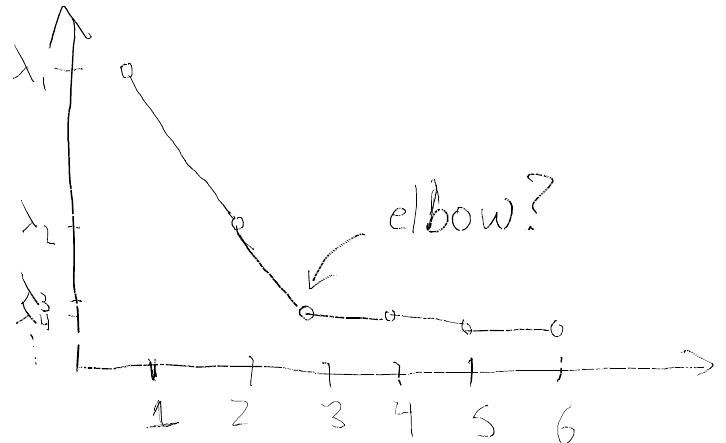

In [ ]:
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64




images = get_images_base64(chunks)
display_base64_image(images[0])


In [72]:
chunks[3].metadata.orig_elements[2].to_dict()

{'type': 'UncategorizedText',
 'element_id': '9eab8bfa-ce41-4f7c-8b49-275b1bcc1aba',
 'text': '(8)',
 'metadata': {'coordinates': {'points': ((1491.8222222222223,
     465.3898499999997),
    (1491.8222222222223, 495.69262777777743),
    (1530.5431116666666, 495.69262777777743),
    (1530.5431116666666, 465.3898499999997)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-04-09T15:34:11',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 2}}

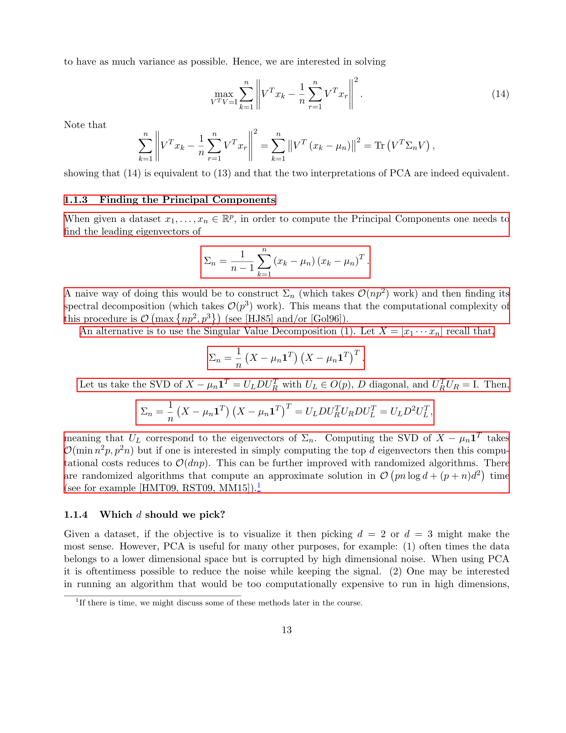

In [93]:
img = pdf_chunker.highlight_chunk_on_page(chunks[4])
img.resize((img.width // 3, img.height // 3))

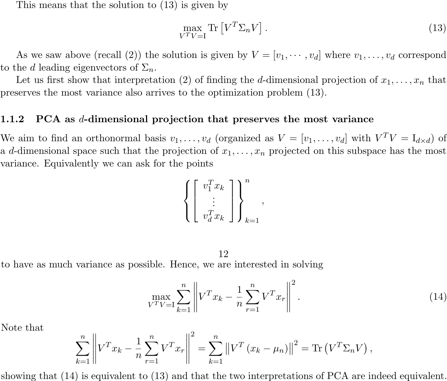

In [92]:
img = pdf_chunker.crop_chunk_on_page(chunks[3])
img.resize((img.width // 3, img.height // 3))